In [ ]:
!pip install ndlib

In [1]:
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import networkx as nx
import numpy as np
import pandas as pd
import pydot

In [2]:
G = nx.watts_strogatz_graph(600, 6, 0.4, seed=None)
G2 = nx.watts_strogatz_graph(600, 6, 0, seed=None)

In [4]:
print('Number of nodes: ',G.number_of_nodes())
print('Number of edges: ',G.number_of_edges())

Number of nodes:  600
Number of edges:  1800


# **DRAW**

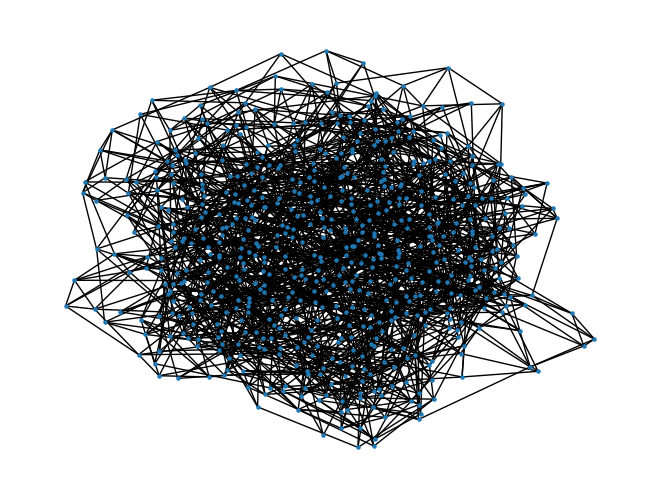

In [ ]:
nx.draw(G, with_labels=False,node_size=5)

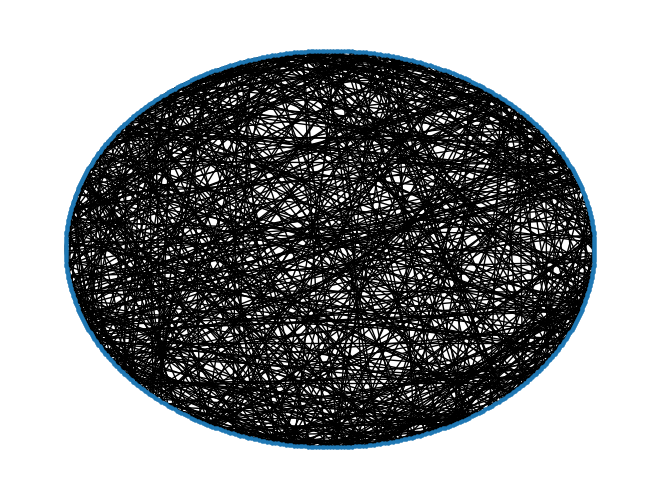

In [ ]:
nx.draw_circular(G, with_labels=False,node_size=5)

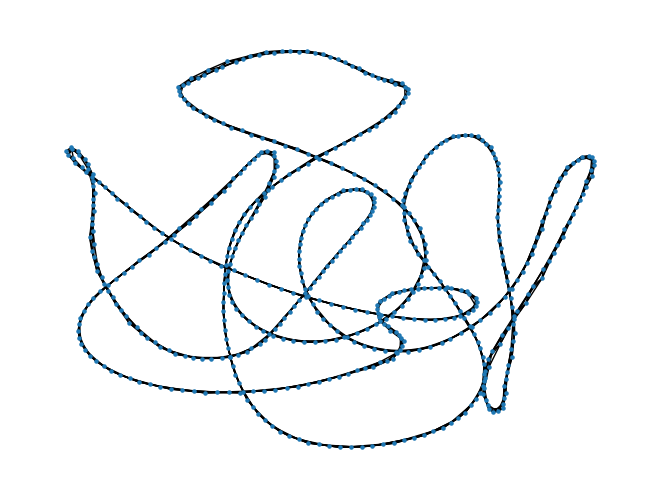

In [ ]:
nx.draw(G2, with_labels=False,node_size=5)

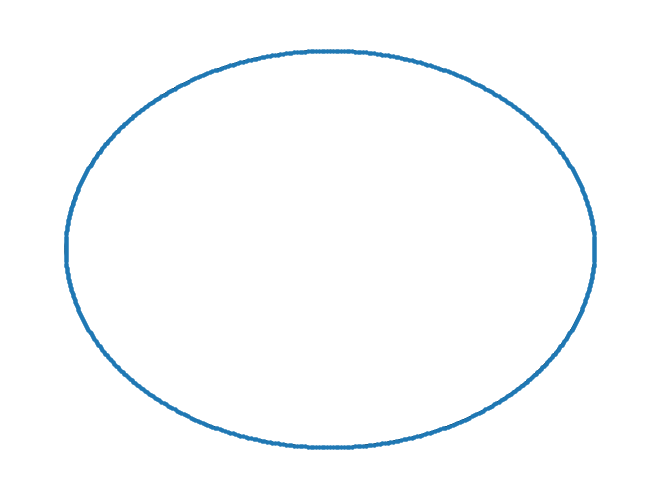

In [ ]:
nx.draw_circular(G2, with_labels=False,node_size=5)

# **Triangles , Giant Component , Degree Sequence**

In [5]:
nx.triangles(G).values()

dict_values([3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 1, 1, 3, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 1, 0, 0, 1, 2, 1, 2, 1, 4, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 6, 4, 6, 6, 3, 3, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 4, 5, 3, 6, 3, 3, 5, 3, 4, 0, 5, 3, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 3, 1, 4, 2, 4, 3, 3, 5, 6, 4, 2, 2, 1, 0, 1, 2, 1, 3, 4, 5, 2, 4, 3, 1, 2, 0, 0, 0, 0, 2, 2, 1, 4, 4, 5, 3, 2, 1, 0, 0, 0, 0, 2, 2, 1, 4, 3, 3, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 3, 1, 1, 2, 2, 4, 6, 5, 6, 7, 5, 3, 6, 3, 6, 4, 4, 3, 0, 0, 0, 1, 0, 4, 4, 5, 4, 0, 2, 1, 1, 3, 5, 5, 4, 1, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 4, 1, 5, 3, 4, 5, 4, 2, 4, 4, 4, 4, 2, 1, 2, 3, 3, 1, 2, 1, 4, 4, 5, 4, 3, 5, 5, 3, 4, 2, 4, 2, 0, 0, 0, 0, 1, 1, 3, 4, 0, 3, 3, 2, 4, 0, 3, 3, 0, 2, 1, 2, 3, 3, 1, 3, 1, 1, 1, 0, 1, 0, 3, 3, 2, 6, 3, 3, 4, 1, 3, 2, 2, 4, 2, 2, 2, 3, 2, 0, 0, 0, 2, 3, 1, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 4, 5, 5, 3, 6, 3, 2, 5, 4, 0, 2, 3, 1, 

In [6]:
s = sum(nx.triangles(G).values())
s = s/3
print (s)

408.0


In [7]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
giant = G.subgraph(Gcc[0])

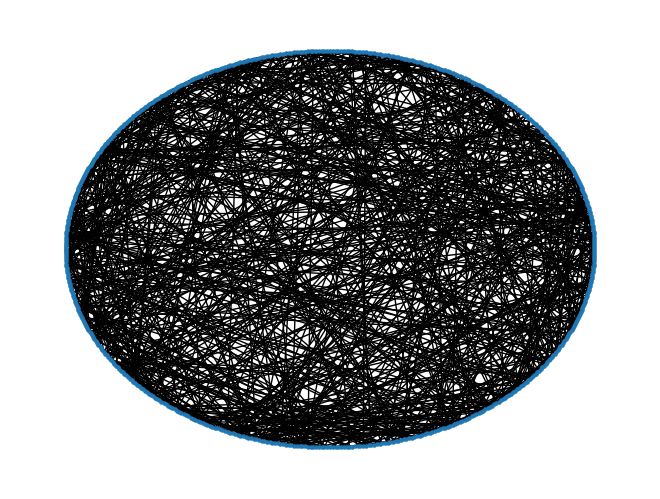

In [8]:
nx.draw_circular(giant, with_labels=False,node_size=5)

In [9]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

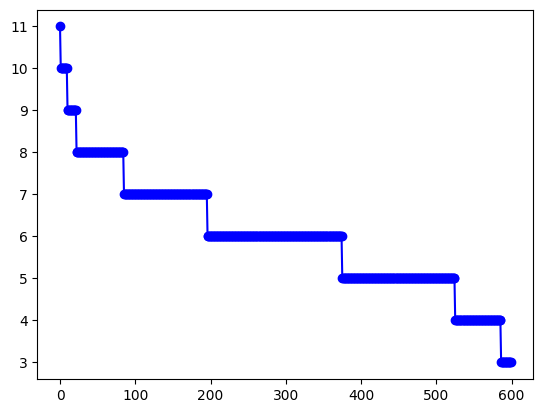

In [10]:
plt.plot(degree_sequence, "b-", marker="o")

# **Influentials**

In [13]:
degree = nx.degree_centrality(G)

In [14]:
f = sorted(degree.items(), key=lambda x:x[1] , reverse=True)
f = [i[0] for i in f]
top_degree = f[0:30]

In [15]:
closeness = {}
for node in G:
    closeness[node] = nx.closeness_centrality(G, node)

In [16]:
c = sorted(closeness.items(), key=lambda x:x[1] , reverse=True)
c = [i[0] for i in c]
top_closeness = c[0:30]

In [11]:
betweenness = {}
for node in G.nodes:
        betweenness[node] = nx.betweenness_centrality(G, normalized=True, endpoints=False)[node]

In [17]:
b = sorted(betweenness.items(), key=lambda x:x[1] , reverse=True)
b = [i[0] for i in b]
top_betweenness = b[0:30]

In [18]:
influentials = np.intersect1d(top_degree , top_closeness,top_betweenness)
influentials

array([  3,  14,  16,  21,  82, 121, 150, 254, 255, 285, 289, 330, 352,
       356, 401, 542])

In [19]:
multi = []
for i in range (len(influentials)):
  multi.append(closeness[influentials[i]]*degree[influentials[i]]*betweenness[influentials[i]])
print (multi)

[3.7978531039188115e-05, 4.459790895634118e-05, 7.29803867606506e-05, 4.147774950934224e-05, 7.851279282820646e-05, 6.5669605798516e-05, 7.044331630450124e-05, 8.113848125487236e-05, 6.49385635160809e-05, 5.0942151471189434e-05, 5.0338596795353185e-05, 5.8223473773010625e-05, 7.221152359860094e-05, 6.1249338618001e-05, 5.130890325930436e-05, 6.830079221240911e-05]


In [23]:
k = 11

idx = np.argpartition(multi, k)
print(idx[0:11])

[10  0 14  3 13  5 11  1  8  9 15]


In [24]:
final_inf = np.delete(influentials, (10,0,14,3,13,5,11,1,8,9,15))
final_inf

array([ 16,  82, 150, 254, 352])

# **SI**

## **Random nodes**

In [117]:
import random

mylist = []

for i in range(0,5):
    x = random.randint(0,600)
    mylist.append(x)

In [118]:
print(mylist)

[509, 93, 283, 70, 449]


### **ten Iteration**

In [121]:
#g = nx.erdos_renyi_graph(1000, 0.1)

model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()

cfg.add_model_parameter('beta', 0.2)
cfg.add_model_parameter("fraction_infected", 0)
cfg.add_model_initial_configuration("Infected", mylist)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(10)

# Get the final state of each node
status = model.status

# Print the status of each node
#for node in G.nodes():
#    print(f"Node {node}: {status[node]}")

In [122]:
# Get the indices of infected nodes in the list
infected_indices = [index for index, node in enumerate(G.nodes) if model.status[node] == 1]
len(infected_indices)

507

In [123]:
H = G.copy()
H.remove_nodes_from(infected_indices)
print('Number of nodes: ',H.number_of_nodes())
print('Number of edges: ',H.number_of_edges())

Number of nodes:  93
Number of edges:  79


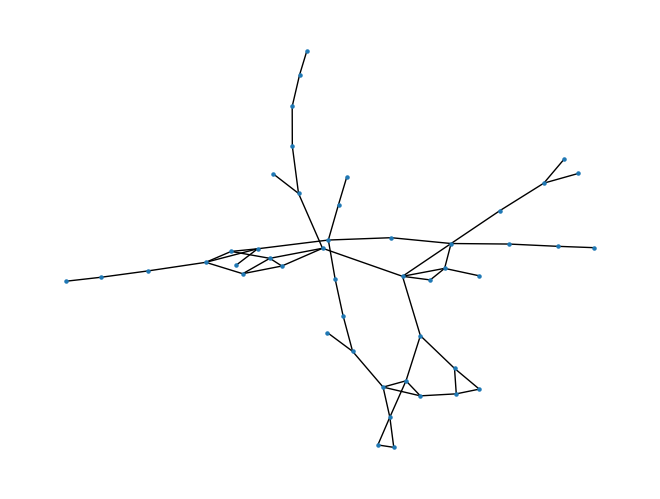

In [124]:
Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
giant = H.subgraph(Gcc[0])
nx.draw(giant, with_labels=False,node_size=5)

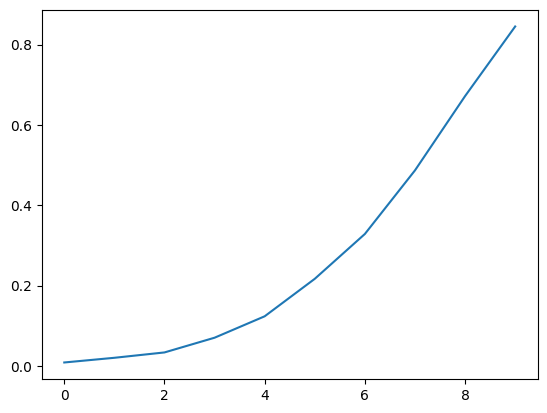

In [126]:
I = []
for i in range (10):
  I.append(iterations[i].get('node_count').get(1)/600)
plt.plot(I)

### **Five Iteration**

In [127]:
#g = nx.erdos_renyi_graph(1000, 0.1)

model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()

cfg.add_model_parameter('beta', 0.2)
cfg.add_model_parameter("fraction_infected", 0)
cfg.add_model_initial_configuration("Infected", mylist)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(5)

# Get the final state of each node
status = model.status

# Print the status of each node
#for node in G.nodes():
#    print(f"Node {node}: {status[node]}")

In [128]:
# Get the indices of infected nodes in the list
infected_indices = [index for index, node in enumerate(G.nodes) if model.status[node] == 1]
len(infected_indices)

46

In [129]:
H = G.copy()
H.remove_nodes_from(infected_indices)
print('Number of nodes: ',H.number_of_nodes())
print('Number of edges: ',H.number_of_edges())

Number of nodes:  554
Number of edges:  1571


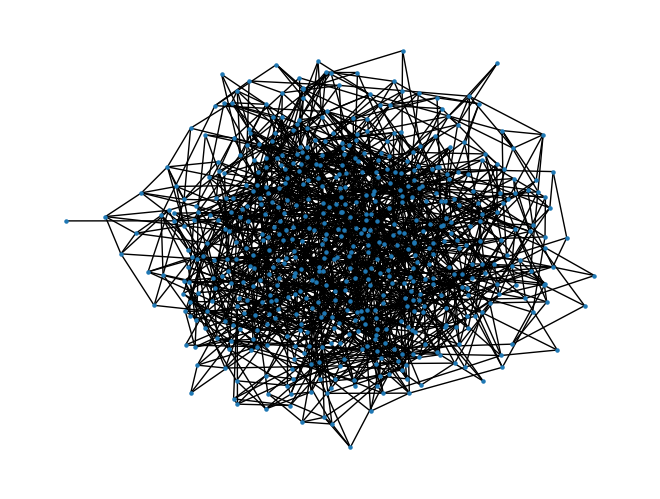

In [130]:
Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
giant = H.subgraph(Gcc[0])
nx.draw(giant, with_labels=False,node_size=5)

### **eight Iteration**

In [154]:
#g = nx.erdos_renyi_graph(1000, 0.1)

model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()

cfg.add_model_parameter('beta', 0.2)
cfg.add_model_parameter("fraction_infected", 0)
cfg.add_model_initial_configuration("Infected", mylist)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(8)

# Get the final state of each node
status = model.status

# Print the status of each node
#for node in G.nodes():
#    print(f"Node {node}: {status[node]}")

In [155]:
# Get the indices of infected nodes in the list
infected_indices = [index for index, node in enumerate(G.nodes) if model.status[node] == 1]
len(infected_indices)

330

In [156]:
H = G.copy()
H.remove_nodes_from(infected_indices)
print('Number of nodes: ',H.number_of_nodes())
print('Number of edges: ',H.number_of_edges())

Number of nodes:  270
Number of edges:  461


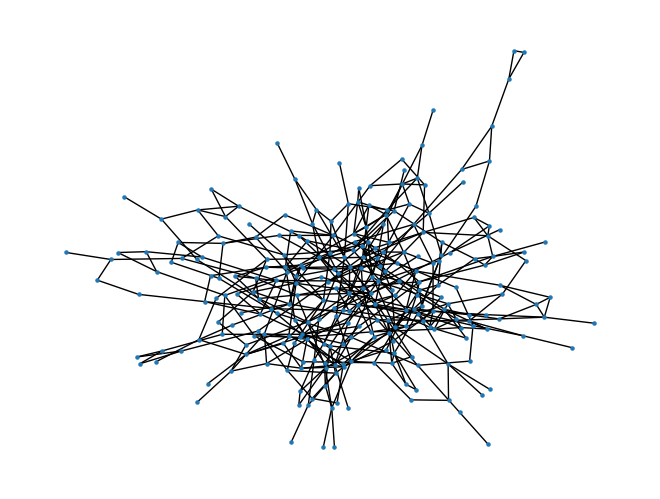

In [157]:
Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
giant = H.subgraph(Gcc[0])
nx.draw(giant, with_labels=False,node_size=5)

## **Influential Nodes**

### **ten Iteration**

In [139]:
#g = nx.erdos_renyi_graph(1000, 0.1)

model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()

cfg.add_model_parameter('beta', 0.2)
cfg.add_model_parameter("fraction_infected", 0)
cfg.add_model_initial_configuration("Infected", final_inf)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(10)

# Get the final state of each node
status = model.status

# Print the status of each node
#for node in G.nodes():
#    print(f"Node {node}: {status[node]}")

In [140]:
# Get the indices of infected nodes in the list
infected_indices = [index for index, node in enumerate(G.nodes) if model.status[node] == 1]
len(infected_indices)

573

In [141]:
H = G.copy()
H.remove_nodes_from(infected_indices)
print('Number of nodes: ',H.number_of_nodes())
print('Number of edges: ',H.number_of_edges())

Number of nodes:  27
Number of edges:  10


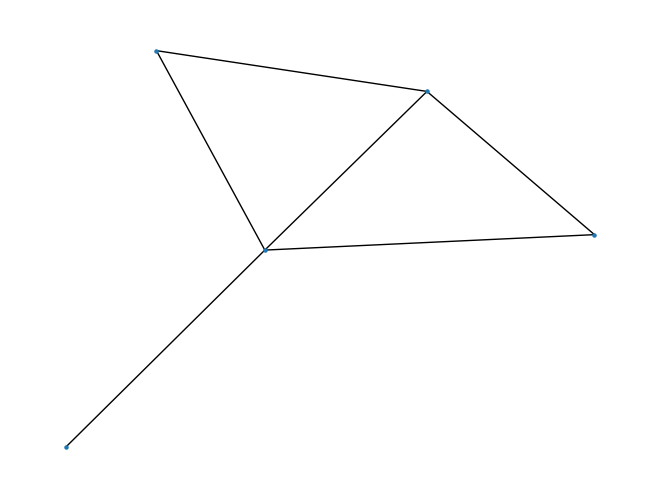

In [142]:
Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
giant = H.subgraph(Gcc[0])
nx.draw(giant, with_labels=False,node_size=5)

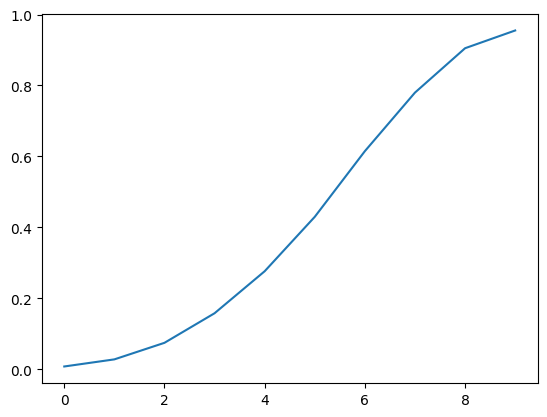

In [144]:
I = []
for i in range (10):
  I.append(iterations[i].get('node_count').get(1)/600)
plt.plot(I)

### **Five Iteration**

In [146]:
#g = nx.erdos_renyi_graph(1000, 0.1)

model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()

cfg.add_model_parameter('beta', 0.2)
cfg.add_model_parameter("fraction_infected", 0)
cfg.add_model_initial_configuration("Infected", final_inf)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(5)

# Get the final state of each node
status = model.status

# Print the status of each node
#for node in G.nodes():
#    print(f"Node {node}: {status[node]}")

In [147]:
# Get the indices of infected nodes in the list
infected_indices = [index for index, node in enumerate(G.nodes) if model.status[node] == 1]
len(infected_indices)

102

In [148]:
H = G.copy()
H.remove_nodes_from(infected_indices)
print('Number of nodes: ',H.number_of_nodes())
print('Number of edges: ',H.number_of_edges())

Number of nodes:  498
Number of edges:  1285


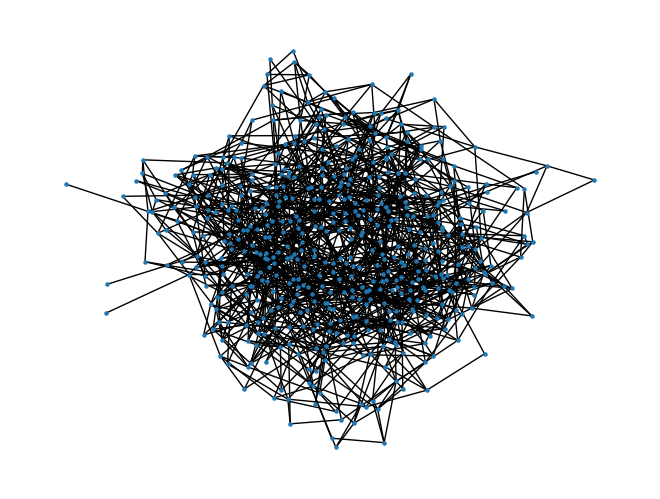

In [149]:
Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
giant = H.subgraph(Gcc[0])
nx.draw(giant, with_labels=False,node_size=5)

### **Eight Iteration**

In [150]:
#g = nx.erdos_renyi_graph(1000, 0.1)

model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()

cfg.add_model_parameter('beta', 0.2)
cfg.add_model_parameter("fraction_infected", 0)
cfg.add_model_initial_configuration("Infected", final_inf)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(8)

# Get the final state of each node
status = model.status

# Print the status of each node
#for node in G.nodes():
#    print(f"Node {node}: {status[node]}")

In [151]:
# Get the indices of infected nodes in the list
infected_indices = [index for index, node in enumerate(G.nodes) if model.status[node] == 1]
len(infected_indices)

419

In [152]:
H = G.copy()
H.remove_nodes_from(infected_indices)
print('Number of nodes: ',H.number_of_nodes())
print('Number of edges: ',H.number_of_edges())

Number of nodes:  181
Number of edges:  258


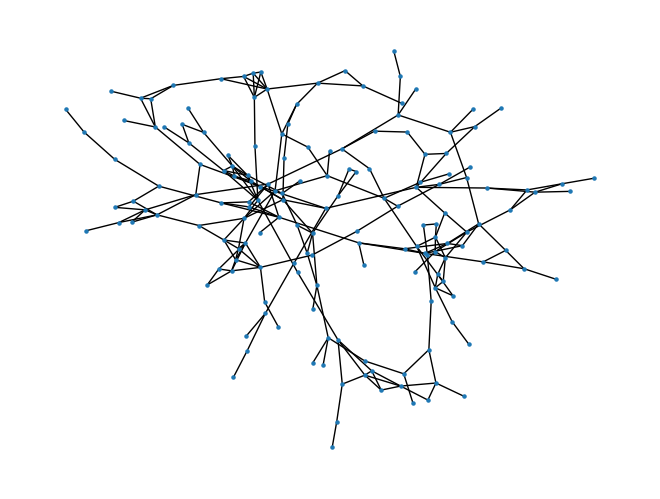

In [153]:
Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
giant = H.subgraph(Gcc[0])
nx.draw(giant, with_labels=False,node_size=5)

## **Scale-Free Graph(barabasi albert)**

In [194]:
G3 = nx.barabasi_albert_graph(600,3)
print('Number of nodes: ',G3.number_of_nodes())
print('Number of edges: ',G3.number_of_edges())

Number of nodes:  600
Number of edges:  1791


In [196]:
degree = nx.degree_centrality(G3)

In [197]:
f = sorted(degree.items(), key=lambda x:x[1] , reverse=True)
f = [i[0] for i in f]
top_degree = f[0:20]

In [199]:
closeness = {}
for node in G3:
    closeness[node] = nx.closeness_centrality(G3, node)

In [200]:
c = sorted(closeness.items(), key=lambda x:x[1] , reverse=True)
c = [i[0] for i in c]
top_closeness = c[0:20]

In [201]:
influentials = np.intersect1d(top_degree , top_closeness)
influentials

array([ 0,  2,  3,  4,  6,  7,  9, 11, 13, 14, 15, 16, 19, 22, 24, 38, 39])

In [202]:
multi = []
for i in range (len(influentials)):
  multi.append(closeness[influentials[i]]*degree[influentials[i]]*betweenness[influentials[i]])
print (multi)

[6.429804510935634e-05, 9.357788958504413e-05, 0.00028500602418658847, 0.00019409011041969347, 9.495554839263453e-05, 0.00013284564728743245, 7.063147972075786e-05, 3.8782401846174516e-05, 5.910895570234604e-05, 0.00016255604579899262, 0.00014043796948902195, 0.00026755351959879196, 0.00010057829620081721, 0.00014744199664628197, 0.00012408015540726227, 6.214203533029483e-05, 9.301142747636516e-05]


In [203]:
k = 12

idx = np.argpartition(multi, k)
print(idx[0:12])

[ 7  8 15  0  1 16  6  4 14 12  5 10]


In [204]:
rnd_inf = np.delete(influentials, (7,8,15,0,1,16,6,4,14,12,5,10))
rnd_inf

array([ 3,  4, 14, 16, 22])

In [211]:
model = ep.SIModel(G3)

# Model Configuration
cfg = mc.Configuration()

cfg.add_model_parameter('beta', 0.2)
cfg.add_model_parameter("fraction_infected", 0)
cfg.add_model_initial_configuration("Infected", rnd_inf)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(8)

# Get the final state of each node
status = model.status

# Print the status of each node
#for node in G.nodes():
#    print(f"Node {node}: {status[node]}")

In [212]:
# Get the indices of infected nodes in the list
infected_indices = [index for index, node in enumerate(G.nodes) if model.status[node] == 1]
len(infected_indices)

560

In [207]:
H = G3.copy()
H.remove_nodes_from(infected_indices)
print('Number of nodes: ',H.number_of_nodes())
print('Number of edges: ',H.number_of_edges())

Number of nodes:  40
Number of edges:  8


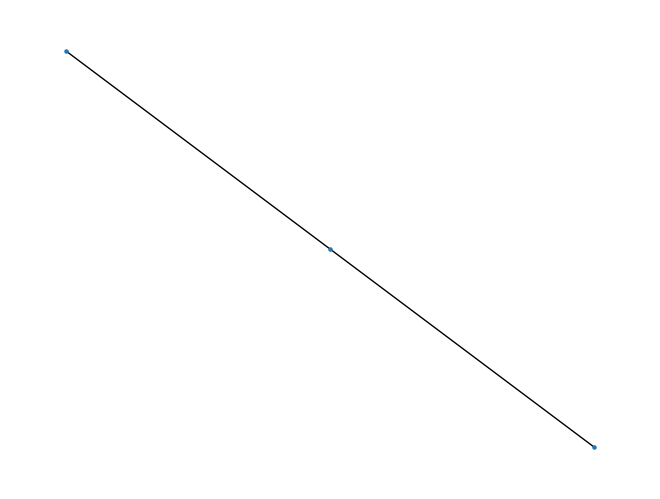

In [208]:
Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
giant = H.subgraph(Gcc[0])
nx.draw(giant, with_labels=False,node_size=5)